 La detección de anomalías es un desafío común en el campo del Machine Learning. Consiste en identificar aquellos datos que presentan comportamientos atípicos, es decir, que se desvían de los patrones considerados “normales” en un conjunto de datos. Un ejemplo clásico de este problema es la detección
 de transacciones financieras fraudulentas, en la que se busca determinar si el uso de una tarjeta de crédito es legítimo o fraudulento.

En este ejercicio se simplifica el problema de detección de fraude utilizando únicamente el monto de la transacción (en USD). Se propone construir un 
modelo sencillo basado en la distribución normal, que se entrene con un conjunto de datos. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv(r"det_fraudes_train(in).csv", encoding='latin1')
test_data = pd.read_csv(r"det_fraudes_test(in).csv", encoding='latin1')

In [3]:
train_data.rename(columns={'categorÃ­a': 'Categoría'}, inplace=True)

 Muestre como estan distribuidos estos set de datos.

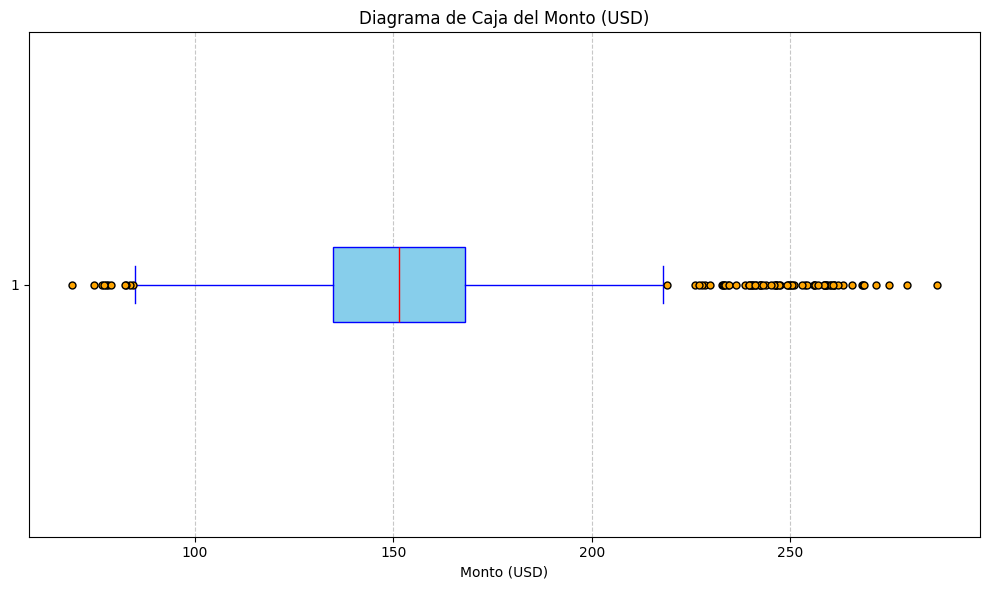

In [18]:
#Grafica de el train data
plt.figure(figsize=(10, 6))

plt.boxplot(train_data['monto (USD)'], 
            vert=False, 
            patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(markerfacecolor='orange', marker='o', markersize=5, linestyle='none'))

plt.title('Diagrama de Caja del Monto (USD)', fontsize=12)
plt.xlabel('Monto (USD)', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [5]:
train_data.describe()


,monto (USD),Categoría
count,2460.000000,2460.000000
mean,153.235244,0.024390
std,28.919999,0.154289
min,69.000000,0.000000
25%,134.700000,0.000000
50%,151.500000,0.000000
75%,168.125000,0.000000
max,286.900000,1.000000


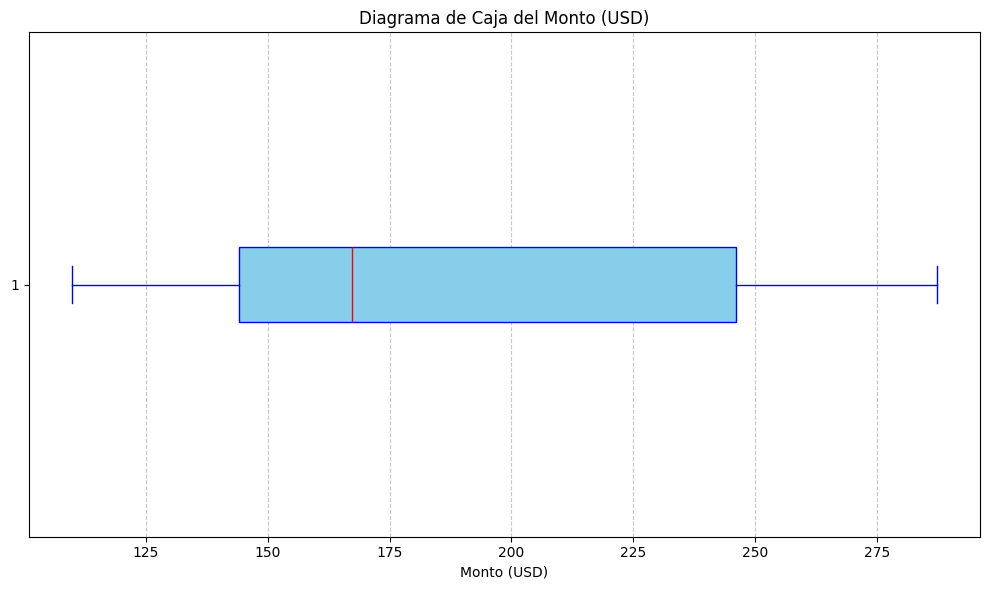

In [19]:
#Grafica de el test data
plt.figure(figsize=(10, 6))

plt.boxplot(test_data['monto (USD)'], 
            vert=False, 
            patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(markerfacecolor='orange', marker='o', markersize=5, linestyle='none'))

plt.title('Diagrama de Caja del Monto (USD)', fontsize=12)
plt.xlabel('Monto (USD)', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [7]:
test_data.describe()

,monto (USD)
count,73.000000
mean,183.505479
std,51.193502
min,109.800000
25%,144.100000
50%,167.200000
75%,246.100000
max,287.300000


A partir de la distribucion Normal, defina un criterio para clasificar una
transaccion como “normal" o “fraudulenta” del set de entrenamiento

In [8]:
mean = train_data['monto (USD)'].mean()
std = train_data['monto (USD)'].std()

print(f"Media: {mean:.2f}, Desviación estándar: {std:.2f}")

Media: 153.24, Desviación estándar: 28.92


In [ ]:
limite_inferior = mean - 3 * std
limite_superior = mean + 3 * std

print(f"El rango considerado normal, esta entre {limite_inferior:.2f} USD y {limite_superior:.2f} USD")

El rango considerado normal, esta entre 66.48 USD y 240.00 USD


In [ ]:
def clasificar_transaccion(monto):
    if monto < limite_inferior or monto > limite_superior:
        return "fraudulenta"
    else:
        return "normal"

In [ ]:
train_data['predicción'] = train_data['monto (USD)'].apply(clasificar_transaccion)

In [12]:
train_data

,monto (USD),Categoría,predicción
0,151.2,0,normal
1,150.5,0,normal
2,142.4,0,normal
3,122.9,0,normal
4,144.5,0,normal
...,...,...,...
2455,155.8,0,normal
2456,156.8,0,normal
2457,177.7,0,normal
2458,139.3,0,normal


Compruebe si el clasificador funciona de forma adecuada, para ello defina la función Exactitud=100(número de aciertos/número total de datos) donde
número total de datos son todos los datos clasificados y número de aciertos es el número de datos (de cualquier categoría, “normal” ó “fraudulenta”)
que fueron clasificados correctamente.

In [13]:
#De acuerdo a la categoria, vamos a crear una nueva columna con la etiqueta real
train_data['etiqueta_real'] = train_data['Categoría'].apply(lambda x: "fraudulenta" if x == 1 else "normal")

In [14]:
train_data

,monto (USD),Categoría,predicción,etiqueta_real
0,151.2,0,normal,normal
1,150.5,0,normal,normal
2,142.4,0,normal,normal
3,122.9,0,normal,normal
4,144.5,0,normal,normal
...,...,...,...,...
2455,155.8,0,normal,normal
2456,156.8,0,normal,normal
2457,177.7,0,normal,normal
2458,139.3,0,normal,normal


In [15]:
#verificar si cada predicción fue correcta o no
train_data['acierto'] = train_data['predicción'] == train_data['etiqueta_real']
train_data

,monto (USD),Categoría,predicción,etiqueta_real,acierto
0,151.2,0,normal,normal,True
1,150.5,0,normal,normal,True
2,142.4,0,normal,normal,True
3,122.9,0,normal,normal,True
4,144.5,0,normal,normal,True
...,...,...,...,...,...
2455,155.8,0,normal,normal,True
2456,156.8,0,normal,normal,True
2457,177.7,0,normal,normal,True
2458,139.3,0,normal,normal,True


In [16]:
# Calcular exactitud
exactitud = 100 * train_data['acierto'].mean()
print(f"La exactitud del modelo en prueba es del: {exactitud:.2f}%")

La exactitud del modelo en prueba es del: 99.51%
